## Import Libraries

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("D:\InternIQ Projects\Creditcard Dataset.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Display summary statistics of numerical features
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Check the distribution of both classes in the dataset
class_distribution = data['Class'].value_counts()

if len(class_distribution) == 2:
    print("Both classes are present in the dataset.")
    print("Class 0 (non-fraudulent transactions):", class_distribution[0])
    print("Class 1 (fraudulent transactions):", class_distribution[1])
else:
    print("The dataset does not contain instances of both classes.")

Both classes are present in the dataset.
Class 0 (non-fraudulent transactions): 284315
Class 1 (fraudulent transactions): 492


## Data Visualization

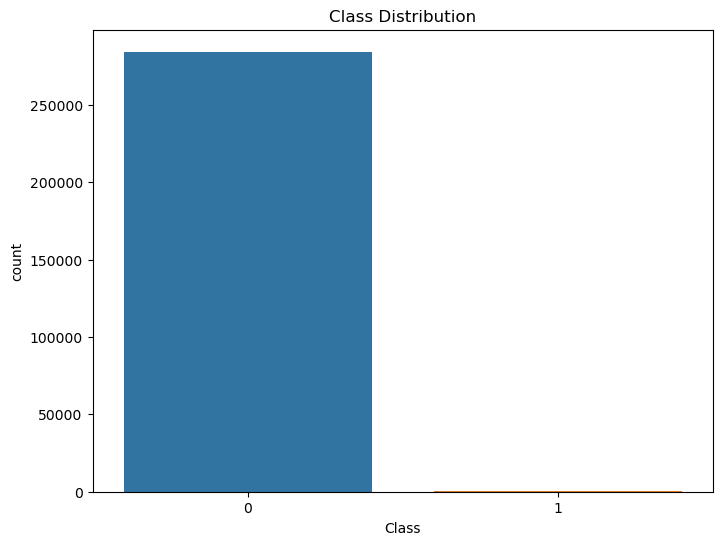

In [7]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

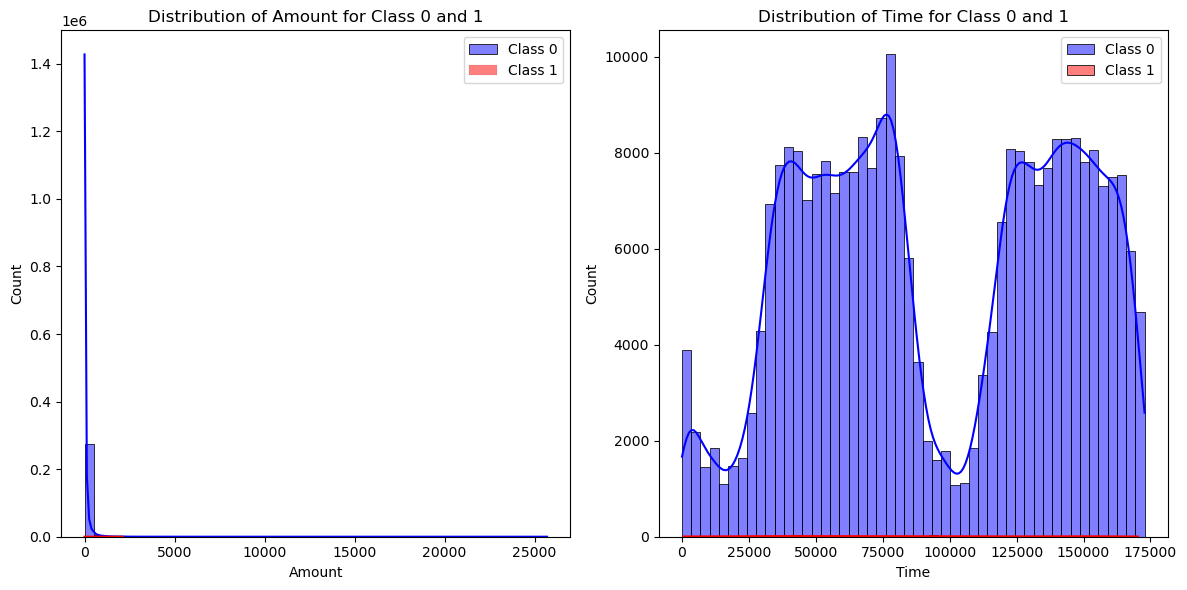

In [8]:
# Visualize the distribution of Amount and Time features for both classes

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Amount for Class 0 and 1')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Time for Class 0 and 1')
plt.legend()

plt.tight_layout()
plt.show()

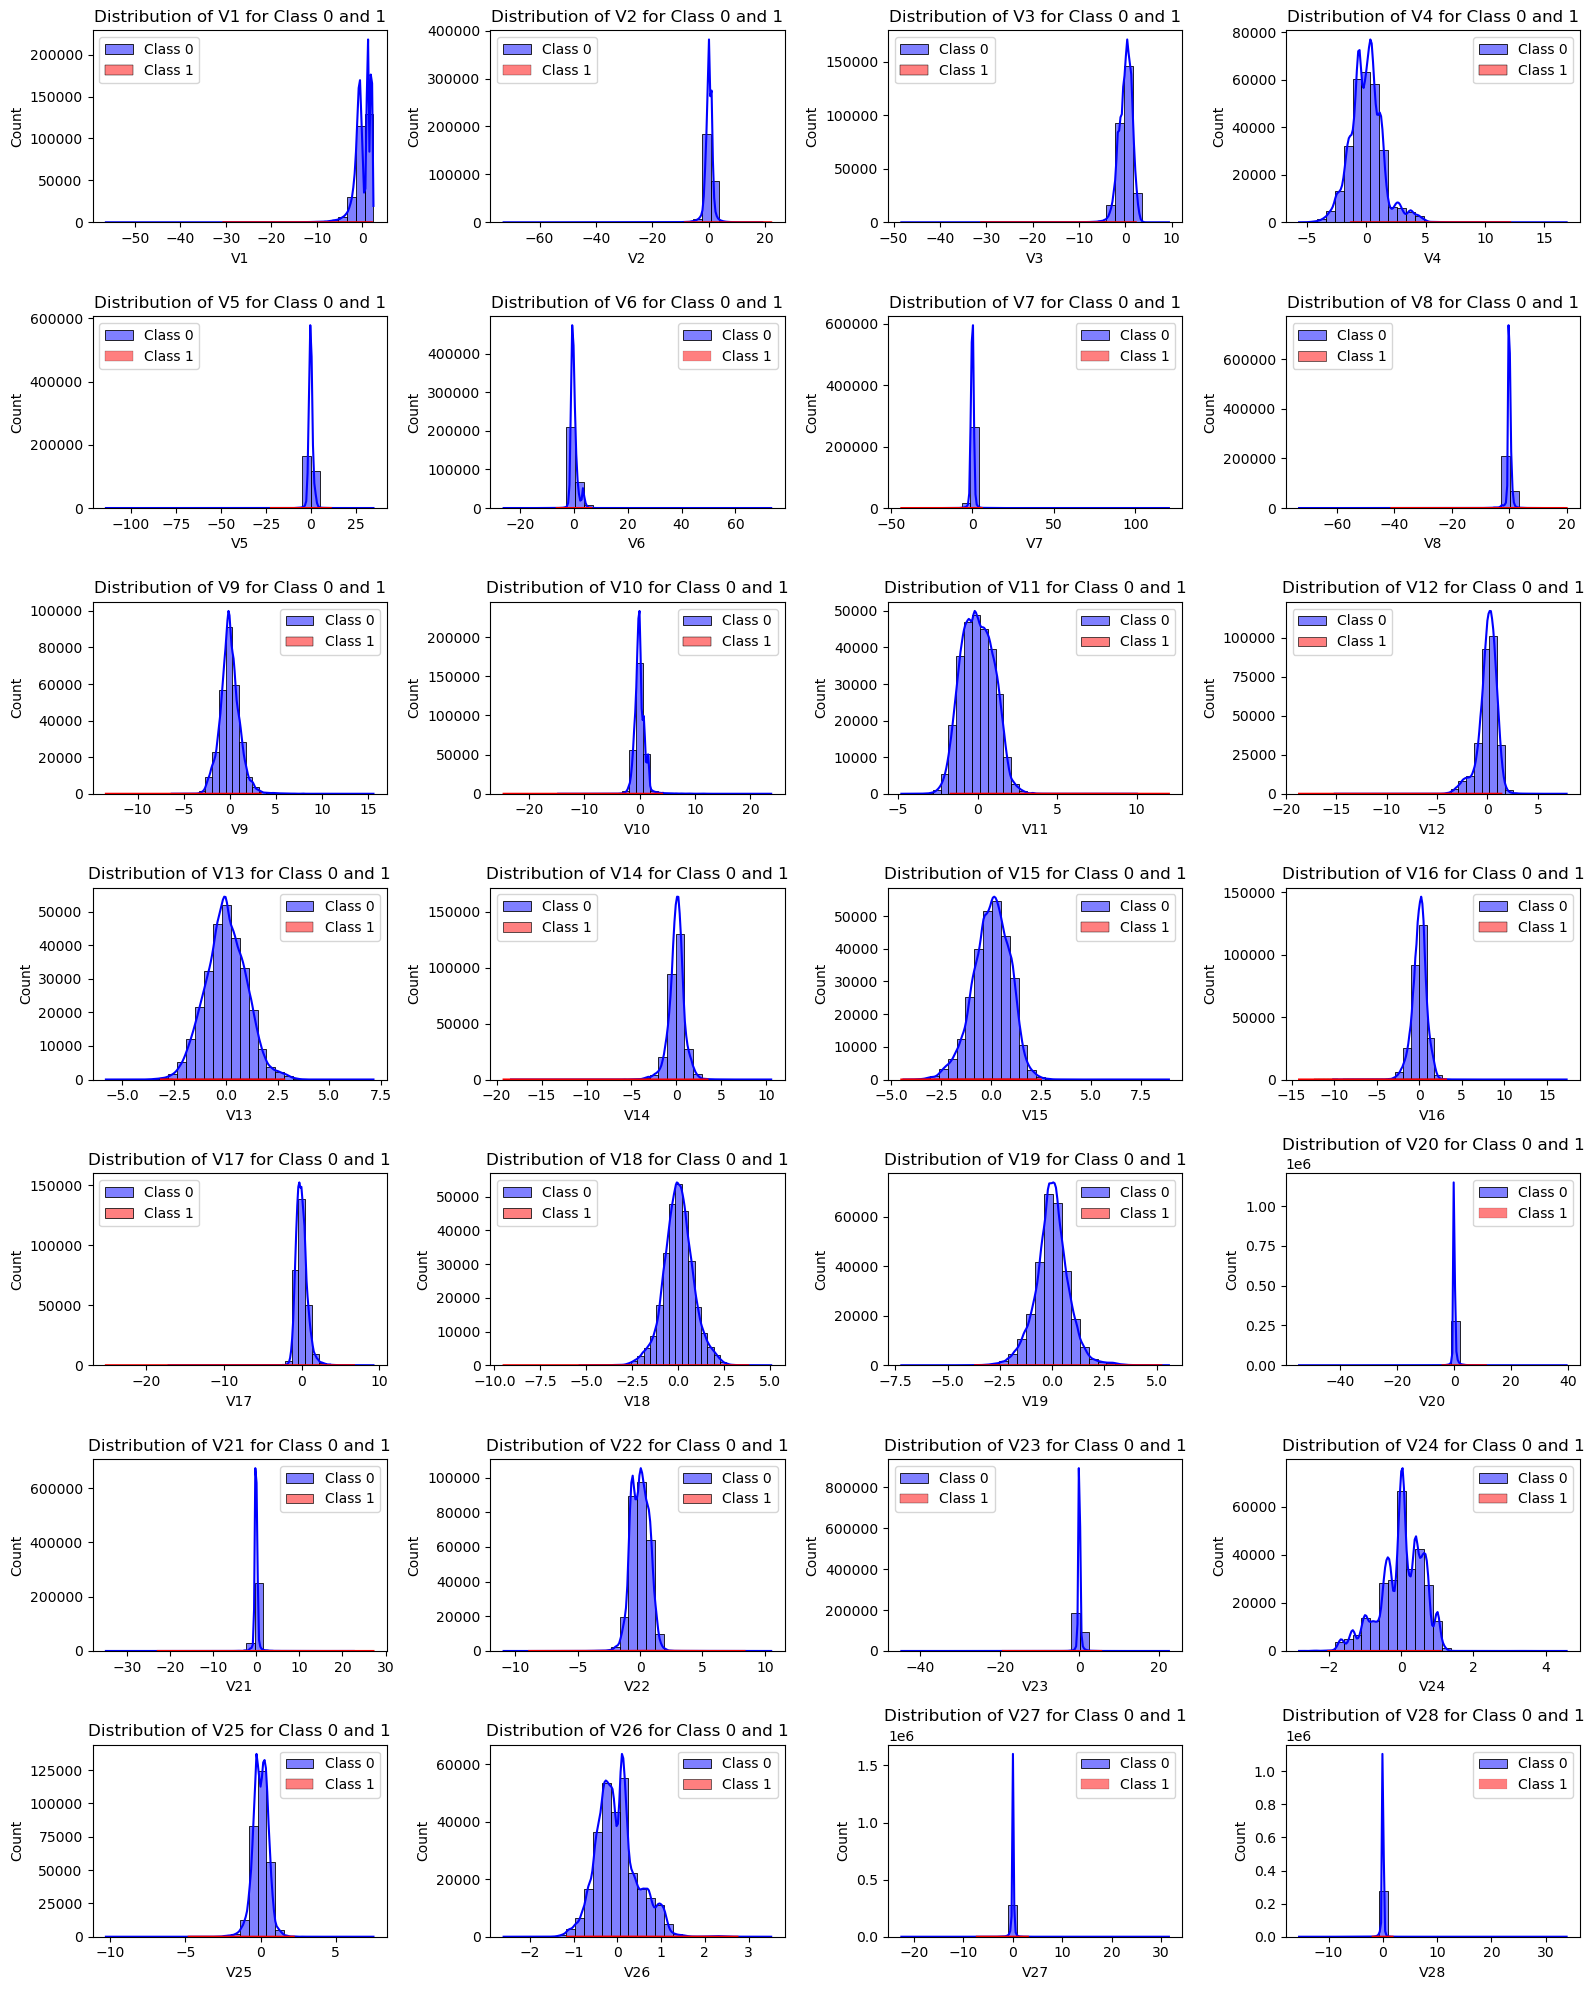

In [9]:
# Visualize the distribution of numerical features for both classes

num_features = data.drop(['Time', 'Amount', 'Class'], axis=1).columns

plt.figure(figsize=(16, 20))
for i, feature in enumerate(num_features, 1):
    plt.subplot(7, 4, i)
    sns.histplot(data[data['Class'] == 0][feature], bins=30, kde=True, color='blue', label='Class 0')
    sns.histplot(data[data['Class'] == 1][feature], bins=30, kde=True, color='red', label='Class 1')
    plt.title(f'Distribution of {feature} for Class 0 and 1')
    plt.legend()

plt.tight_layout()
plt.show()


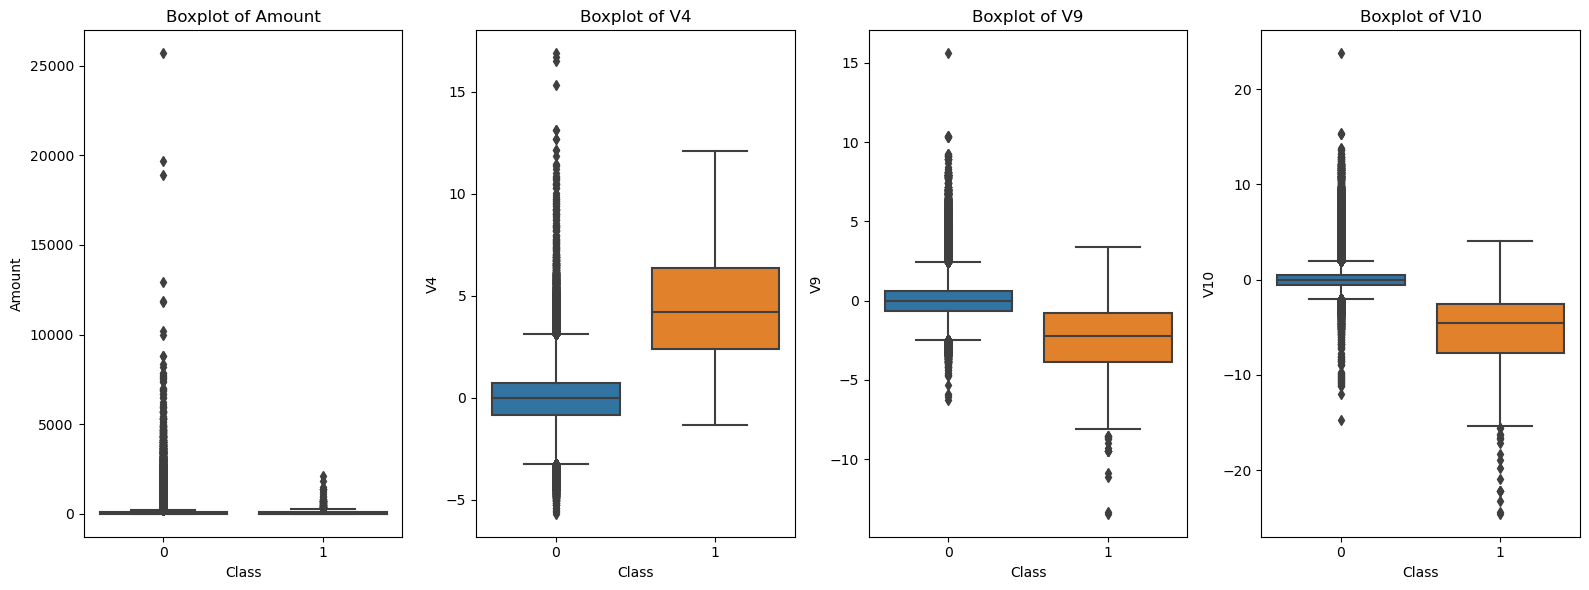

In [10]:
# Visualize boxplots for some key features

plt.figure(figsize=(16, 6))
for i, feature in enumerate(['Amount', 'V4', 'V9', 'V10'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


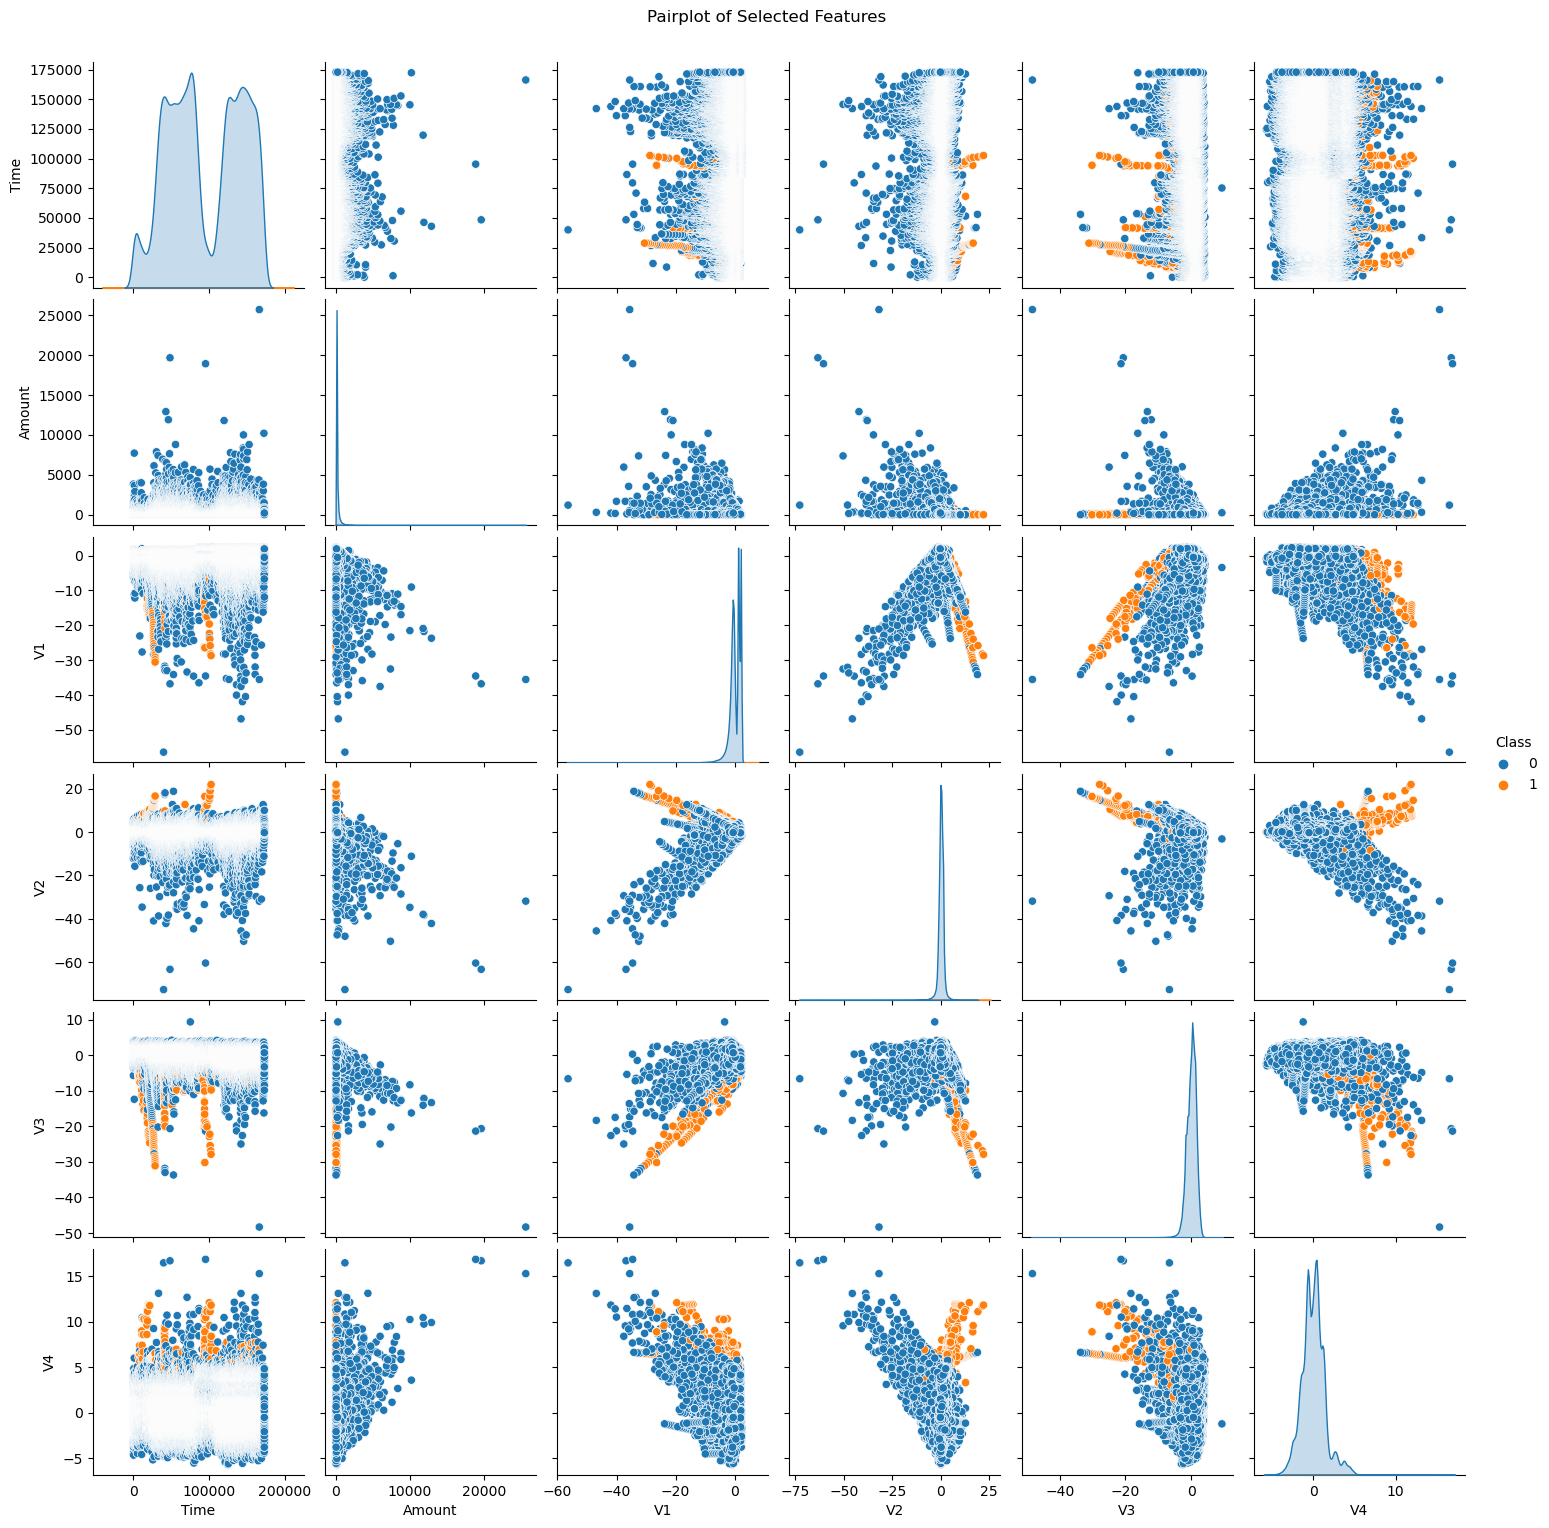

In [11]:
# Visualize pairplots for a subset of features

subset_features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4']
sns.pairplot(data[subset_features + ['Class']], hue='Class', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


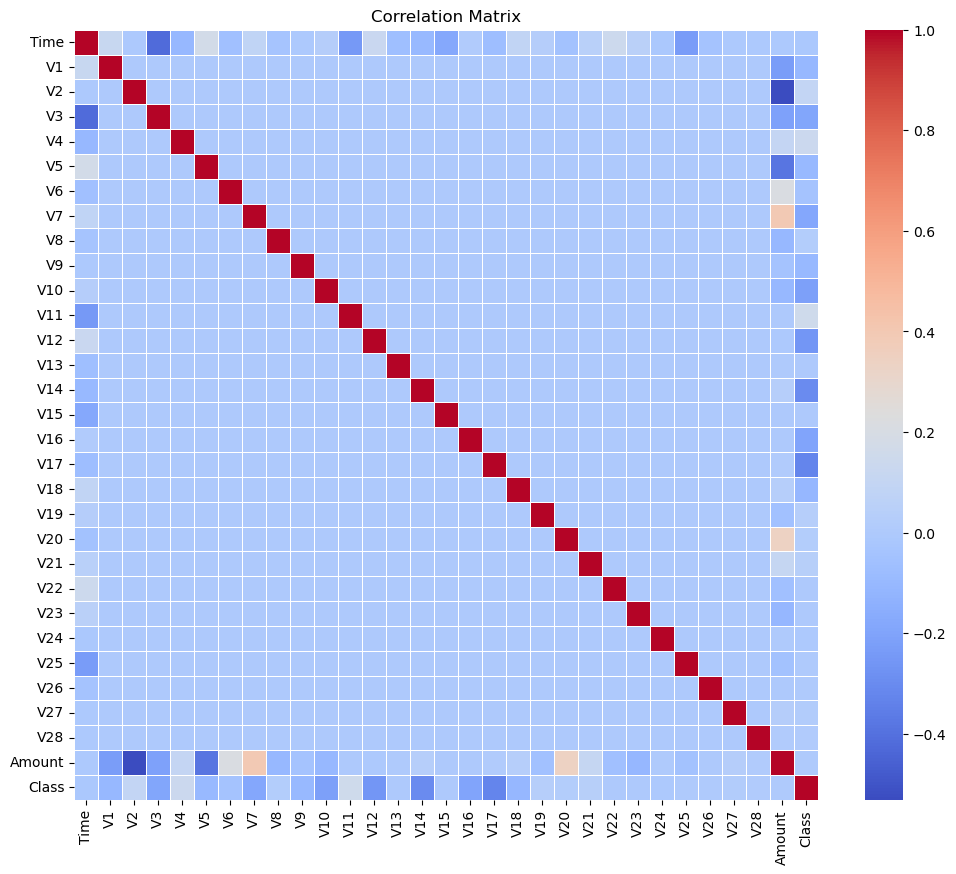

In [12]:
# Visualize correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Model Implementation

In [13]:
# Split the data into features (X) and target variable (y)

X = data.drop('Class', axis=1)
y = data['Class']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Build a Random Forest Classifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

In [18]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



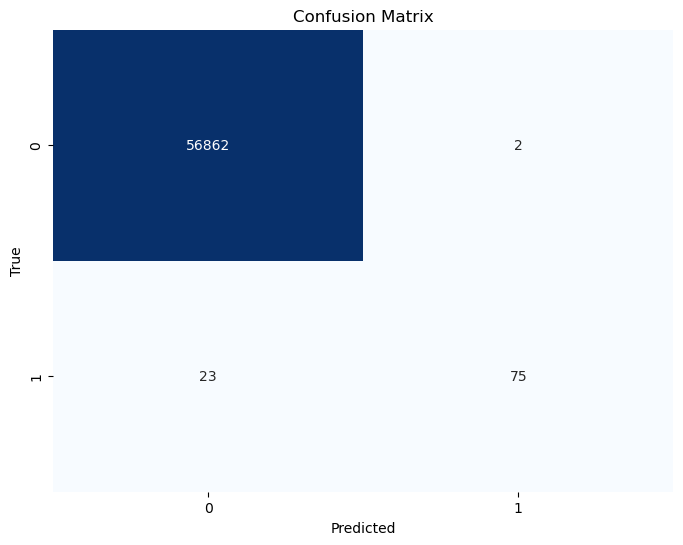

In [19]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9995611109160493


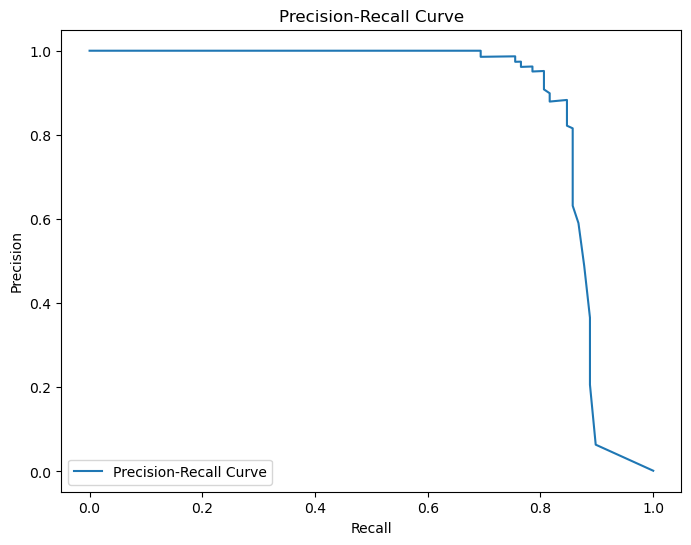

In [21]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

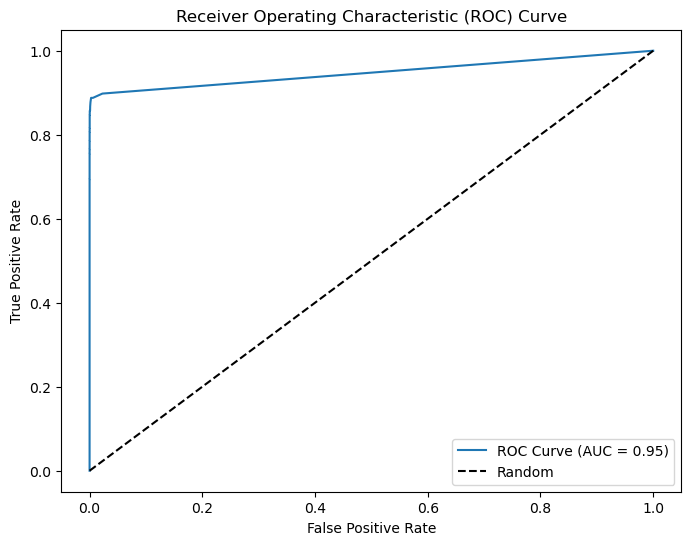

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

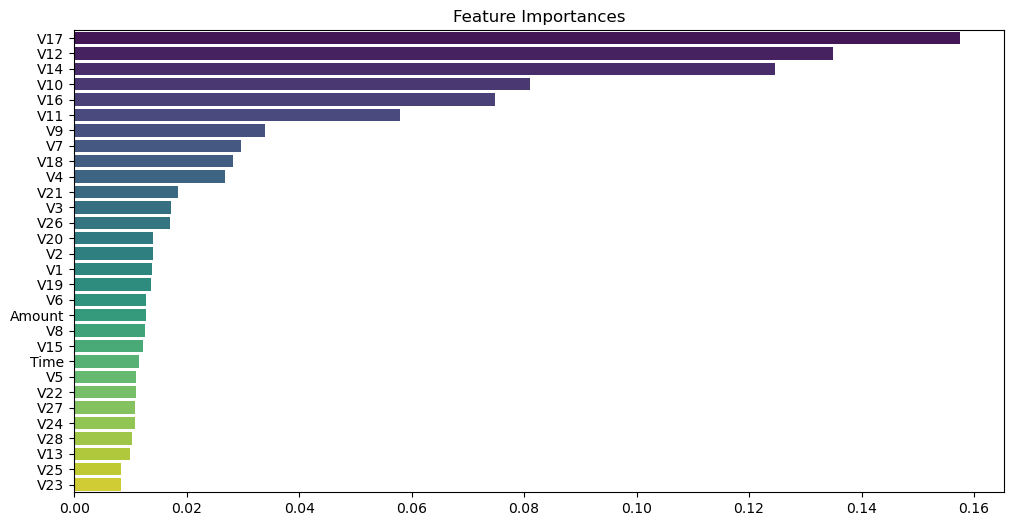

In [23]:
# Feature Importances
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
plt.title('Feature Importances')
plt.show()